<h1>Анализ формулы один с использованием методов машинного обучения и математической статистики</h1>

<h2>Первоначальной нашей целью будет прогноз вероятности совершения обгона на каждом из участков трассы.</h2>

<h3>Этап первый: определение обгонов</h3>

In [2]:
import fastf1 as ff1
import pandas as pd
import numpy as np
import datetime
import math

ff1.Cache.enable_cache('cache')
session = ff1.get_session(2021, 20, 'R')
quali = ff1.get_session(2021, 20, 'Q')
quali = pd.DataFrame(quali.results)

In [3]:
laps = session.load_laps(with_telemetry=True)
session.load_telemetry()

core           INFO 	Loading laps for Qatar Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
utils          INFO 	NumExpr defaulting to 8 threads.
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['55', '7', '4', '44', '99', '16', '14', '77', '10', '22', '5', '9', '6', '33', '31', '47', '3', '11', '63', '18']
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data


In [4]:
laps[laps['LapNumber'] == 1] # как мы можем заметить, гонщики расположены изначально в их стартовой позиции

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,SpeedST,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 01:04:22.536000,44,NaT,1,1,0 days 00:26:09.766000,NaT,NaT,0 days 00:00:29.290000,0 days 00:00:30.113000,...,298.0,MEDIUM,4.0,False,0 days 01:02:48.573000,Mercedes,HAM,1,False,2021-11-21 14:03:48.583
57,0 days 01:04:25.380000,10,NaT,1,1,0 days 00:21:44.304000,NaT,NaT,0 days 00:00:30.171000,0 days 00:00:30.449000,...,304.0,SOFT,4.0,False,0 days 01:02:48.573000,AlphaTauri,GAS,1,False,2021-11-21 14:03:48.583
113,0 days 01:04:24.411000,14,NaT,1,1,0 days 00:24:22.842000,NaT,NaT,0 days 00:00:30.081000,0 days 00:00:30.035000,...,296.0,SOFT,4.0,False,0 days 01:02:48.573000,Alpine F1 Team,ALO,1,False,2021-11-21 14:03:48.583
170,0 days 01:04:26.913000,4,NaT,1,1,0 days 00:25:37.139000,NaT,NaT,0 days 00:00:30.716000,0 days 00:00:30.657000,...,299.0,SOFT,4.0,False,0 days 01:02:48.573000,McLaren,NOR,1,False,2021-11-21 14:03:48.583
226,0 days 01:04:30.677000,77,NaT,1,1,0 days 00:26:22.016000,NaT,NaT,0 days 00:00:31.530000,0 days 00:00:31.173000,...,309.0,MEDIUM,4.0,False,0 days 01:02:48.573000,Mercedes,BOT,1,False,2021-11-21 14:03:48.583
275,0 days 01:04:28.589000,55,NaT,1,1,0 days 00:25:10.409000,NaT,NaT,0 days 00:00:31.559000,0 days 00:00:30.837000,...,307.0,MEDIUM,4.0,False,0 days 01:02:48.573000,Ferrari,SAI,1,False,2021-11-21 14:03:48.583
332,0 days 01:04:26.076000,33,NaT,1,1,0 days 00:23:15.690000,NaT,NaT,0 days 00:00:30.461000,0 days 00:00:30.451000,...,302.0,MEDIUM,4.0,False,0 days 01:02:48.573000,Red Bull,VER,1,False,2021-11-21 14:03:48.583
389,0 days 01:04:29.151000,22,NaT,1,1,0 days 00:23:04.624000,NaT,NaT,0 days 00:00:31.833000,0 days 00:00:30.745000,...,309.0,SOFT,4.0,False,0 days 01:02:48.573000,AlphaTauri,TSU,1,False,2021-11-21 14:03:48.583
445,0 days 01:04:27.722000,31,NaT,1,1,0 days 00:24:27.532000,NaT,NaT,0 days 00:00:31.045000,0 days 00:00:30.824000,...,302.0,SOFT,4.0,False,0 days 01:02:48.573000,Alpine F1 Team,OCO,1,False,2021-11-21 14:03:48.583
502,0 days 01:04:33.542000,5,NaT,1,1,0 days 00:23:59.625000,NaT,NaT,0 days 00:00:32.352000,0 days 00:00:31.850000,...,319.0,SOFT,4.0,False,0 days 01:02:48.573000,Aston Martin,VET,1,False,2021-11-21 14:03:48.583


In [170]:
laps['LapEndTime'] = laps['LapStartTime'] + laps['LapTime']

Сделаем подготовку данных для просчета обгонов
Отберем для каждого гонщика те записи, где менялся гонщик впереди, аналогичные же записи отберем для других гонщиков

<h3> Дальнейшая работа и алгоритм вычисления места обгона </h3>
Алгоритм следующий: для каждого гонщика считается его текущая позиция в каждый момент предполагаемого обгона. Обгон засчитывается, если позиция не была возвращена до конца круга, аналогично в дальнейших версиях алгоритма стоит исключить обгоны из-за заездов на питстоп. Таким образом, алгоритм будет следующим:
<ol style="color: green">
<li>Посчитать сетку на конец круга</li>
<li>Найти смены позиций, если таковые были</li>
<li>Найти где была произведена окончательная смена позиций</li>
<li style="color: red">Выделить места борьбы за место</li>
</ol>

Что считается обгоном: <a href="https://www.motorsport.com/f1/news/overtaking-records-in-f1-most-overtakes-in-a-race-by-a-driver/6718440/">motorsport.com</a>

Чуть более подробно по пунктам:
Первоначальная расстановка берется исходя из квалификации ( данный момент в процессе доработки, т.к. после квалификации перед гонкой могут происходить перестановки )
Далее алгоритм:
1. Берется расстановка на начало круга ( конец предыдущего ) и конец круга
2. Вычисляется массив вида: a = <a style="color: yellow">[1, -1, 0, 2, 0, -2 ... ]</a>, где в каждой ячейке стоит число n - количество потерянных / выигранных позиций относительно начала круга.
3. Находится первый отрицательный элемент в массиве, назовем его <i>x</i>, тогда предыдущие abs(<i>x</i>) элементов - гонщиков, которые пропустили нашего, у предыдущих <i>x</i> элементов вычитается по единице, сам элемент x обнуляется
4. вычисляются <i>x</i> гонщиков впереди, далее: y - рассматриваемый обогнавший гонщик, количество возможных значений <i>y</i>: abs(<i>x</i>)
5. ищется наименьшее время, когда для обгоняемого гонщика ( с <i>x</i> потерянных позиций ), гонщик <i>y</i> оказался впереди, берется X и Y этой позиции и записывается один обгон

Пример:
[22, 11, 10] - номера гонщиков и их расположение на начало круга
[10, 11, 22] - номера гонщиков и их расположение на конец круга

тогда нужный нам массив смены мест:
[2, 0, -2],
первый отрицательный элемент = -2, тогда:
1. ищем обгон 22'ого гощника 10'ым
2. ищем обгон 22'ого гонщика 11'ым

массив смены мест после этого:
[1, -1, 0]
Первый отрицательный элемент = -1, тогда:
1. ищем обгон 11'ого гонщика 10'ым

<a style="color: grey"> Под поиском обгона подразумевается алгоритм нахождения под пунктом 5, а именно выделение наименьшего времени</a>

In [6]:
def get_starting_grid(laps_data, quali_data):
    quali_grid = quali_data['number'].tolist()
    race_starting = []
    for driver in range(len(quali_grid)):
        try:
            _ = laps_data.pick_driver(quali_grid[driver]).get_telemetry()
            race_starting.append(quali_grid[driver])
        except Exception as _:
            pass
    return np.array(race_starting)

def calculate_lap_grid(data, lap_num):
    return data[data['LapNumber'] == lap_num].sort_values(by=['LapEndTime'])

def get_position_of_overtake(data, overtaken_driver, driver):
    driver_data = data.pick_driver(overtaken_driver).get_telemetry()
    index = driver_data[driver_data['DriverAhead'] == driver].index.min()
    return [None, None] if np.isnan(index) else [driver_data.loc[[index]].iloc[0]['X'], driver_data.loc[[index]].iloc[0]['Y']]

def find_and_process_overtake(grid_to_process, data, lap_number):
    overtaken_driver = grid_to_process[-1]
    lap_data = data[data['LapNumber'] == lap_number]
    overtakes = []
    for driver in grid_to_process[:-1]:
        x, y = get_position_of_overtake(lap_data, overtaken_driver, driver)
        if x is not None:
            overtakes.append([x, y])
    return overtakes

def calculate_overtakes(grid_to_process, difference_in_grid, data, lap_number):
    overtakes_to_find = []
    i = 0
    while i < len(difference_in_grid):
        if difference_in_grid[i] < 0:
            overtakes_to_find += (find_and_process_overtake(grid_to_process[i + difference_in_grid[i]:i + 1], data, lap_number))
            difference_in_grid[i + difference_in_grid[i]:i] += np.full(len(difference_in_grid[i + difference_in_grid[i]:i]), -1)
            difference_in_grid[i] = 0
            difference_in_grid = np.array(list(difference_in_grid[:i + difference_in_grid[i]]) + list(difference_in_grid[i + difference_in_grid[i]:i]) + list(difference_in_grid[i:]))
            i += difference_in_grid[i] - 1
        i += 1
    return overtakes_to_find

In [7]:
previous_grid = np.array(get_starting_grid(laps, quali))
overtakes = []
for i in range(1, laps['LapNumber'].max() + 1):
    transition_grid = dict(zip(previous_grid, np.arange(1, len(previous_grid) + 1)))
    current_grid = calculate_lap_grid(laps, i)['DriverNumber'].to_list()
    previous_grid = current_grid
    current_grid = np.array([transition_grid[driver] for driver in current_grid])
    difference = current_grid - np.array(sorted(current_grid))
    overtakes += calculate_overtakes(previous_grid, difference, laps, i)

In [8]:
overtakes

[[-2133, 1943],
 [-981, 3256],
 [-290, -1333],
 [-589, 3022],
 [-758, -465],
 [-720, -535],
 [-714, -547],
 [-1221, 413],
 [-745, -491],
 [-689, -596],
 [-767, -448],
 [-782, -419],
 [-1557, 3609],
 [-738, -500],
 [-1458, 856],
 [-2496, 2590],
 [-2302, 3735],
 [-1795, 1409],
 [-1757, 1347],
 [-1844, 1485],
 [-1539, 997],
 [-2003, 1737],
 [-1204, 3390],
 [2884, -6560],
 [2559, -6146],
 [1504, -4242],
 [1431, -4112],
 [1146, -3600],
 [1027, -3387],
 [871, -3106],
 [657, -2721],
 [324, -2124],
 [-2000, 1732],
 [2583, -6188],
 [1330, -3931],
 [1226, -3745],
 [1109, -3535],
 [884, -3130],
 [602, -2623],
 [363, -2193],
 [-1441, 912],
 [-2009, 1748],
 [-1127, 234],
 [3002, -6687],
 [1708, -4991],
 [1502, -4628],
 [1424, -4101],
 [1184, -3669],
 [716, -2827],
 [178, -1863],
 [179, -1862],
 [178, -1861],
 [145, -1800],
 [-97, -1363],
 [-2128, 1936],
 [-680, -315],
 [-1110, 202],
 [3257, -6669],
 [1326, -3925],
 [1171, -3646],
 [1066, -3457],
 [524, -2482],
 [472, -2389],
 [50, -1632],
 [46, -16

## Посмотрим на визуализацию мест обгонов на одной конкретной трассе за разные года. Для этого выберем трассу которая не менялась с 2014 года.
 <i style="color: #ff2800"> небольшое уточнение, все координаты представлены в 1/10 метра, мы разделим всю трассу на зоны

In [9]:
x_size_of_sector = 50
y_size_of_sector = 50

<h2> Давайте создадим нашу трассу </h2>

In [10]:
def num_of_overtakes_in_segment(point, overtakes_df):
    return len(overtakes_df[(overtakes_df['X'] == math.floor(point['X'] // 10  // x_size_of_sector)) & (overtakes_df['Y'] == math.floor(point['Y'] // 10 // y_size_of_sector))])

lap = laps.pick_fastest()
tel = lap.get_telemetry()

x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)

overtakes_to_display = pd.DataFrame({"X": x, "Y": y})
overtakes_to_process = pd.DataFrame({"X": [x[0] for x in overtakes], "Y": [x[1] for x in overtakes]})
print(overtakes_to_process)
overtakes_to_process['X'] = overtakes_to_process['X'].apply(lambda i: math.floor(i // 10  // x_size_of_sector))
overtakes_to_process['Y'] = overtakes_to_process['Y'].apply(lambda i: math.floor(i // 10  // x_size_of_sector))
print(overtakes_to_process)
overtakes_to_display['nOvertakes'] = overtakes_to_display.apply(lambda i: num_of_overtakes_in_segment(i, overtakes_to_process), axis=1)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

        X     Y
0   -2133  1943
1    -981  3256
2    -290 -1333
3    -589  3022
4    -758  -465
..    ...   ...
216  -496  -644
217 -2224  3765
218  5904  5473
219 -2153  1976
220 -1931  1623

[221 rows x 2 columns]
      X   Y
0    -5   3
1    -2   6
2    -1  -3
3    -2   6
4    -2  -1
..   ..  ..
216  -1  -2
217  -5   7
218  11  10
219  -5   3
220  -4   3

[221 rows x 2 columns]


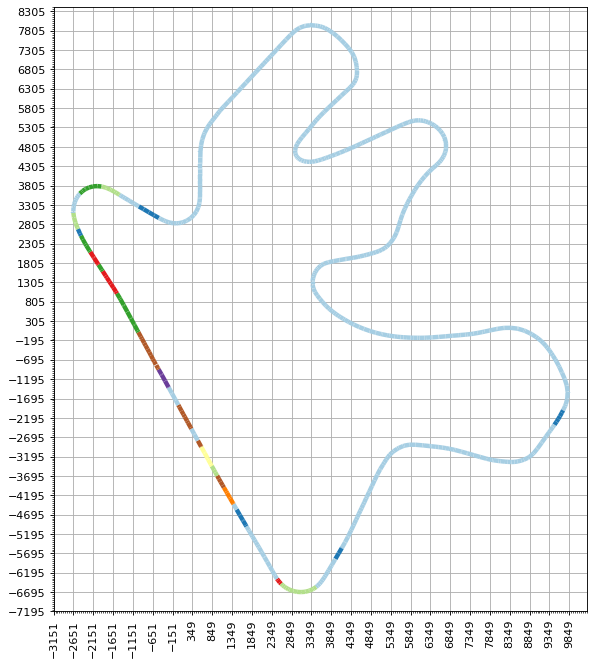

In [11]:
from matplotlib.collections import LineCollection
from matplotlib import cm
import matplotlib.pyplot as plt

max_x = overtakes_to_display['X'].max() + 500
min_x = overtakes_to_display['X'].min() - 500
max_y = overtakes_to_display['Y'].max() + 500
min_y = overtakes_to_display['Y'].min() - 500

fig,ax = plt.subplots(figsize=(10 * (max_x + abs(min_x)) / (max_y + abs(min_y)), 10), dpi=80)

overtake = overtakes_to_display['nOvertakes'].to_numpy().astype(float)

cmap = cm.get_cmap('Paired')
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(overtake)
lc_comp.set_linewidth(4)
ax.add_collection(lc_comp)

major_ticks_x = np.arange(min_x, max_x, 10 * x_size_of_sector)
minor_ticks_x = np.arange(min_x, max_x, x_size_of_sector)

major_ticks_y = np.arange(min_y, max_y, 10 * y_size_of_sector)
minor_ticks_y = np.arange(min_y, max_y, y_size_of_sector)

ax.set_xticks(major_ticks_x)
ax.set_xticks(minor_ticks_x, minor=True)
ax.set_yticks(major_ticks_y)
ax.set_yticks(minor_ticks_y, minor=True)
plt.grid()
plt.xticks(rotation=90)
plt.show()

Попробуем получить настоящие данные трасс ( увы, дальнейшее использование невозможно т.к. датасет не содержит все нужные треки, но он достоин упомянания:
<a href="https://github.com/TUMFTM/racetrack-database"> github.com </a>

In [12]:
map_data = pd.read_csv("Monza.csv")
map_data.rename(columns={"# x_m": "x_m"}, inplace=True)

<ipython-input-13-862992a89269>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


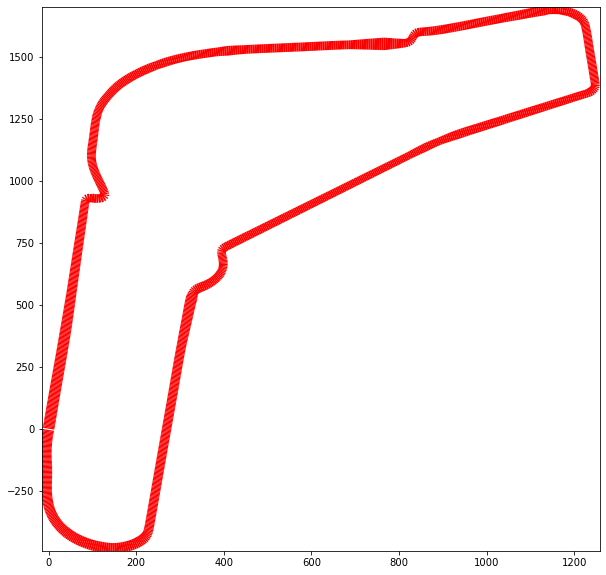

In [13]:
x = map_data['x_m']
y = map_data['y_m']
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, linewidths=map_data['w_tr_left_m'] + map_data['w_tr_right_m'], color='red')
fig,a = plt.subplots(figsize=[10, 10])
a.add_collection(lc)
a.set_xlim(x.min() - 10, x.max() + 10)
a.set_ylim(y.min() - 10, y.max() + 10)
fig.show()

Предполагаемое описание алгоритма:
<ol style="color: red">
<li>Выделить только первые записи для каждого сектора</li>
<li>Посчитать была ли смена позиций в конце сектора</li>
<li>Добавить среднюю скорость на секторе, скорость автомобиля впереди, среднее кол-во обгонов на секторе за круг</li>
</ol>

Что важно отметить:
Мы уберем упомянание команды и гонщика из выборки, вот по каким причинам: из года в год значимость команды меняется, то, что мерседес доминировали в 2019 году не дает никаких гарантий на последующие гонки. Введём альтернативу: позиция команды в кубке конструкторов и позиция гонщика в общем зачете на данный момент

Нами был сформирован достаточно обширный датасет хранящий в себе данный о гонщике и данные о гонщике впереди, мы попытаемся предсказать был ли обгон в конце сектора по началу сектора

In [163]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score

data = pd.read_csv("complete_df_2021_1.csv")
data = data.append(pd.read_csv("complete_df_2021_2.csv"))
data = data.append(pd.read_csv("complete_df_2021_3.csv"))
data = data.append(pd.read_csv("complete_df_2021_4.csv"))
data = data.append(pd.read_csv("complete_df_2021_5.csv"))
X = data.drop(columns=['Overtake', 'Status', 'SessionTime', 'Date', 'Unnamed: 0', 'Source', 'Time'])
y = data['Overtake']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [164]:
clf = RandomForestClassifier(n_estimators= 800, min_samples_split= 2, min_samples_leaf = 1, max_features='auto',max_depth=100, bootstrap= True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f1_score(y_pred, y_test), roc_auc_score(y_pred, y_test), precision_score(y_pred, y_test), recall_score(y_pred, y_test))

0.8308823529411764 0.970892899294798 0.7361563517915309 0.9535864978902954


In [161]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, refit='precision', n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X, y)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [169]:
laps.pick_driver("44").get_telemetry().shape

(43463, 18)

In [160]:
from scipy import stats
data_balanced = data.drop_duplicates()
stats.itemfreq(data_balanced['Overtake'])

<ipython-input-160-14e55684d122>:3: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  stats.itemfreq(data_balanced['Overtake'])


array([[0.000e+00, 8.571e+03],
       [1.000e+00, 3.940e+02]])

In [159]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(clf, X, y, cv=5, scoring='precision'))

[1.         1.         0.76131687 1.         1.        ]


In [3]:
second_df = pd.read_csv("complete_df_2021_2.csv")
second_df_var2 = pd.read_csv("races/2021/2/overall.csv")

In [8]:
second_df.shape, second_df_var2.drop_duplicates().shape

((6161, 27), (9977, 26))

In [9]:
second_df_var2.drop_duplicates()

,Unnamed: 0,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,...,X,Y,Z,DriverNumber,X_sector,Y_sector,Driver_ahead_speed,Driver_ahead_DRS,Driver_ahead_throttle,Overtake
0,0,2021-03-28 15:07:17.607,0 days 00:37:17.597000,44.000000,0.1799999999999499,0 days 00:00:07.627000,11276,250,6,100,...,-181,6463,-143,33,-2,64.0,258.0,1.0,100.0,0.0
1,1,2021-03-28 15:07:17.675,0 days 00:37:17.665000,44.000000,0.4466666666666299,0 days 00:00:07.695000,11359,251,6,100,...,-181,6501,-143,33,-2,65.0,260.0,1.0,100.0,0.0
2,2,2021-03-28 15:07:18.327,0 days 00:37:18.317000,44.000000,1.580000000000041,0 days 00:00:08.347000,11601,256,6,100,...,-168,6983,-138,33,-2,69.0,263.0,1.0,100.0,0.0
3,3,2021-03-28 15:07:18.555,0 days 00:37:18.545000,44.000000,1.8466666666667304,0 days 00:00:08.575000,11713,258,6,100,...,-164,7147,-137,33,-2,71.0,264.0,1.0,100.0,0.0
4,4,2021-03-28 15:07:18.775,0 days 00:37:18.765000,44.000000,1.6300000000000807,0 days 00:00:08.795000,11846,259,6,87,...,-158,7305,-136,33,-2,73.0,251.0,1.0,100.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9972,2021-03-28 15:56:18.895,0 days 01:26:18.885000,6,289.598611,0 days 00:49:08.915000,8484,227,8,0,100,...,7198,-4,5,68,71,180.0,0.0,0.0,0.0,NaN
9973,2021-03-28 15:56:19.014,0 days 01:26:19.004000,6,289.298611,0 days 00:49:09.034000,8773,212,8,0,100,...,7185,-3,5,69,71,173.0,0.0,0.0,0.0,NaN
9974,2021-03-28 15:56:19.135,0 days 01:26:19.125000,6,288.998611,0 days 00:49:09.155000,9062,197,8,0,100,...,7171,-1,5,70,71,158.0,0.0,0.0,0.0,NaN
9975,2021-03-28 15:56:19.375,0 days 01:26:19.365000,6,288.465278,0 days 00:49:09.395000,9112,181,8,0,100,...,7139,0,5,71,71,139.0,0.0,0.0,0.0,NaN
